In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="16maps_alpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_16maps_alpha_2sE_dataset_pretokenize/output_16maps_alpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

EEE: 402
HH: 400
IIII: 393
CC: 387
NN: 386
AA: 382
LL: 382
PP: 382
DD: 382
OO: 380
II: 380
MMMM: 380
NNN: 380
JJ: 379
HHHHH: 379
GGGGG: 376
KK: 376
KKKKKK: 374
OOOO: 374
JJJJ: 372
MMMMM: 372
AAAAA: 370
IIIII: 369
AAAA: 368
NNNNN: 368
FF: 367
CCCCCC: 367
EE: 365
DDDDD: 364
JJJ: 362
GG: 362
EEEEEE: 357
KKKK: 357
PPPP: 357
OOOOOO: 355
MM: 352
FFFFFF: 352
BB: 351
KKKKK: 350
EEEEE: 350
IIIIII: 349
HHHHHH: 349
CCC: 348
CCCCC: 347
AAAAAA: 347
PPPPP: 346
PPP: 346
OOO: 346
JJJJJ: 346
CCCC: 342
KKK: 341
OOOOO: 339
PPPPPPP: 338
JJJJJJ: 337
GGGGGG: 336
GGG: 335
GGGG: 334
DDDDDD: 334
PPPPPP: 332
MMMMMM: 332
GGGGGGG: 331
CCCCCCC: 330
AAA: 330
LLLLLLL: 330
LLLLL: 328
AAAAAAA: 325
FFFFF: 325
NNNNNN: 322
BBBBBB: 318
DDDD: 316
NNNN: 316
MMMMMMM: 315
BBBB: 314
IIIIIII: 313
EEEE: 311
LLLLLL: 310
OOOOOOO: 310
FFFFFFFF: 308
BBBBBBB: 307
EEEEEEE: 307
FFFFFFF: 304
III: 303
DDD: 302
HHHH: 301
HHHHHHH: 294
BBBBB: 293
KKKKKKK: 291
NNNNNNN: 291
HHH: 287
HHHHHHHH: 286
DDDDDDD: 286
MMM: 286
BBBBBBBBB: 284
LLLLLLLL:

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

66: 402
23: 400
51: 393
33: 387
30: 386
24: 382
22: 382
28: 382
37: 382
31: 380
35: 380
47: 380
63: 380
36: 379
83: 379
78: 376
27: 376
107: 374
46: 374
52: 372
93: 372
85: 370
86: 369
40: 368
92: 368
26: 367
114: 367
34: 365
87: 364
68: 362
29: 362
111: 357
43: 357
44: 357
113: 355
32: 352
106: 352
25: 351
90: 350
84: 350
117: 349
104: 349
61: 348
79: 347
103: 347
77: 346
64: 346
65: 346
89: 346
50: 342
60: 341
82: 339
124: 338
116: 337
109: 336
59: 335
48: 334
112: 334
108: 332
115: 332
127: 331
128: 330
57: 330
118: 330
81: 328
119: 325
88: 325
110: 322
105: 318
53: 316
45: 316
125: 315
42: 314
131: 313
49: 311
101: 310
126: 310
71: 308
121: 307
130: 307
122: 304
67: 303
69: 302
38: 301
120: 294
73: 293
123: 291
129: 291
56: 287
70: 286
133: 286
62: 286
137: 284
74: 284
95: 284
58: 282
72: 280
91: 278
138: 276
99: 273
132: 271
98: 271
100: 271
96: 260
94: 259
136: 259
80: 257
97: 257
75: 255
76: 252
41: 251
134: 247
142: 242
135: 242
102: 239
149: 232
146: 232
144: 231
143: 228
140:

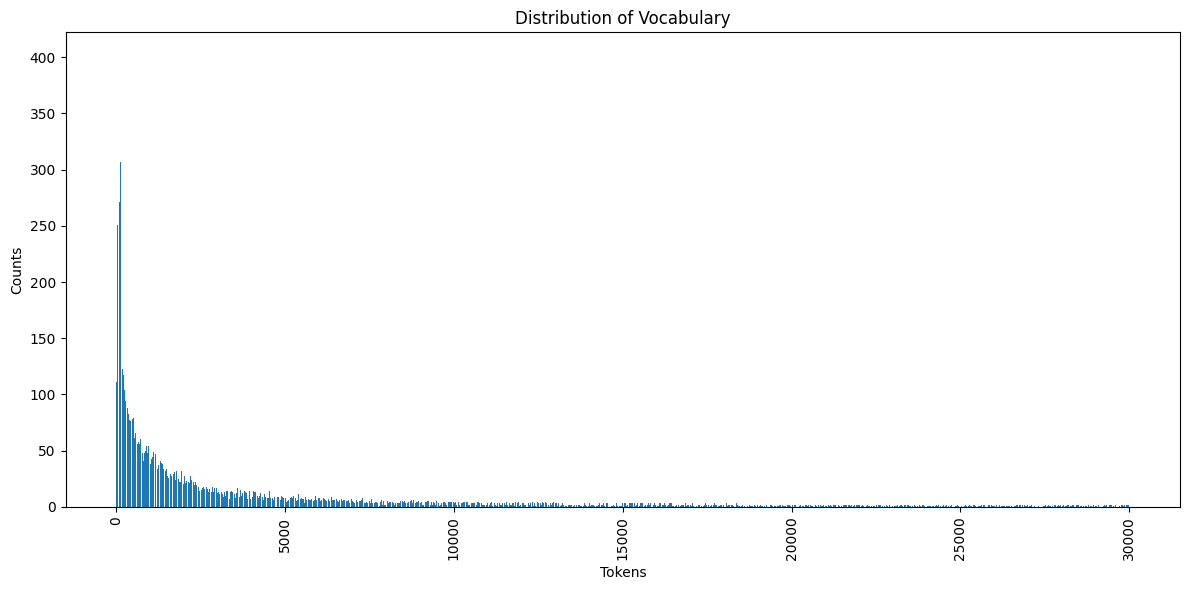

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


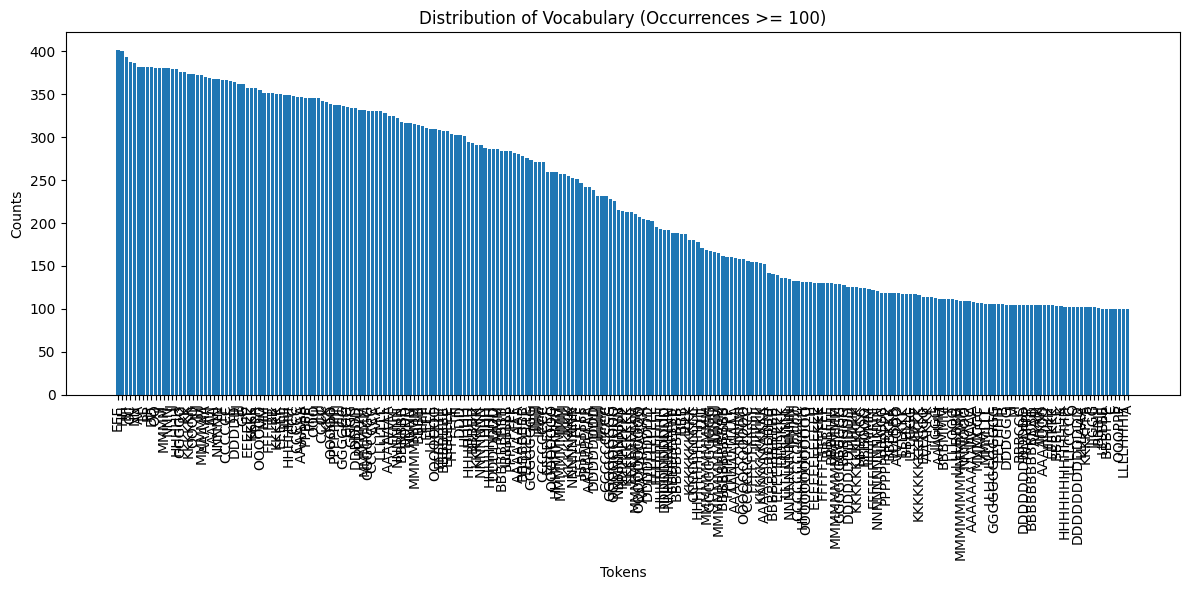

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 243
vocab_count_decoded: 27291
recommended size vocab: 256


In [18]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828